### SML Assignment 1

#### Question 2: K-Means Clustering and Fuzzy Means Clustering

- In the first step, we read the input data given to us as a `.npy` file and load it into an array `arr_loaded`.
- The array `arr_loaded` is a 3000 x 2 array where every row corresponds to a point in $R^2$. In every row, the first column corresponds to the x-coordinate and the second to the y-coordinate.
- We load this data into the array and print the shape and the first 10 entries

### Loading the Dataset:

In [19]:
# Importing the libraries needed
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Loading the npy dataset provided for this question
arr_loaded = np.load('kmeans_data.npy')

# Printing the shape of the loaded array
print("Shape of the Loaded Array is" + str(arr_loaded.shape))
print("Printing first 10 rows of the loaded array: ")

for i in range(10):
    print(arr_loaded[i][0], arr_loaded[i][1])

Shape of the Loaded Array is(3000, 2)
Printing first 10 rows of the loaded array: 
3.6277635974718736 5.791773645836638
1.7696035048275314 0.4256478851815271
-3.946892138390321 -5.401916932004386
3.724562175198204 4.841266914704309
1.519412300929707 2.093489823487129
4.177586338901869 5.262680104004519
7.0359302298246265 5.848749120685312
0.5089195209856655 0.7763459191233113
-4.48984877706329 -5.245791473953581
-3.528183115574126 -5.212780853707939


### Implementing the k-Means Clustering Algorithm from Scratch:


In [21]:
# Input to this function is k i.e. the number of clusters and a numpy array of shape (n, 2) where n is the number of data points
def goel_kmeans(k, data, threshold):
    
    # Initialize the centroids randomly in the starting
    centroids = np.random.choice(data.shape[0], size=k, replace=False)
    centroids = data[centroids]

    # Initialize the clusters (clusters numpy array will store the cluster number for each data point)
    clusters = np.zeros(data.shape[0])

    # Initialize the distance array (distance array will store the distance of each data point from each centroid)
    distance = np.zeros((data.shape[0], k))

    # Number of iterations
    iterations = 10000

    # List for storing centroids of the previous iteration for comparing the final step
    prev_iter_centroid = np.zeros((k, 2))
    for i in range(iterations):

        # Breaking the loop if the centroids are not changing
        if(np.allclose(centroids, prev_iter_centroid, threshold) and i > 1):
            break

        # Calculating the distance of each point from the centroids (Euclidean distance)
        for j in range(k):
            distance[:, j] = np.linalg.norm(data - centroids[j], axis=1)
        
        # Assigning the data points to the clusters based on the minimum distance
        clusters = np.argmin(distance, axis=1)
        
        # Calculating the new centroids
        for j in range(k):
            prev_iter_centroid[j] = centroids[j]
            centroids[j] = np.mean(data[clusters == j], axis=0)
    
    # Returning the clusters and centroids
    return np.array(clusters), np.array(centroids)

- Running the k-means functions for k-values = $[2,3,4,5,6,7,8,9,10]$
- Threshold for convergence = $10^{-7}$ 
- The Numpy array `arr_cluster_vals` is a (3000 x 9) matrix where each row corresponds to the 3000 points in the input array. Each column corresponds to the cluster number for each value of k after the k-means algorithm is called on them.
- The list `arr_centroid_vals` has 9 rows and each rows stores k-number of centroids determined after running the k-means algorithm

### Running the k-Means Algorithm:

In [22]:
# List of k values for which the algorithm will be run
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Threshold for the convergence of the algorithm
threshold = 1e-7

# Initializing the array for storing the cluster value/ID for each data point for each k value
arr_cluster_vals = np.zeros((arr_loaded.shape[0], len(k_values)))

# Initializing the array for storing the centroid values for each k value
arr_centroid_vals = []

# Running the algorithm for each k value and storing the cluster values and centroid values
for i in range(len(k_values)):
    x,y = goel_kmeans(k_values[i], arr_loaded, threshold)
    arr_centroid_vals.append(y)
    for j in range(arr_loaded.shape[0]):
        arr_cluster_vals[j][i] = x[j]

# Printing the cluster IDs for all points for k = 2
print("Printing the cluster IDs for all points for k = 2: ")
print(arr_cluster_vals[:, 0])

# Printing the centroid values for k = 2
print("Printing the centroid values for k = 2: ")
print(arr_centroid_vals[0])

Printing the cluster IDs for all points for k = 2: 
[0. 1. 1. ... 0. 1. 1.]
Printing the centroid values for k = 2: 
[[ 5.50229675  5.47526072]
 [-1.31699819 -1.64830225]]


- Plotting the clusters for each value of k. Each cluster corresponds to a unique color in the scatter plot

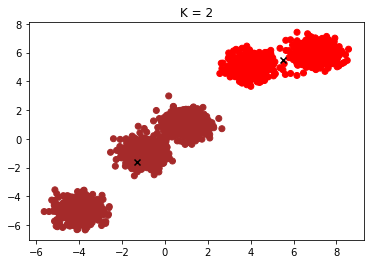

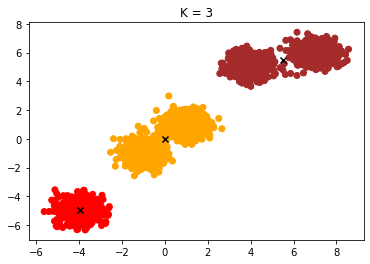

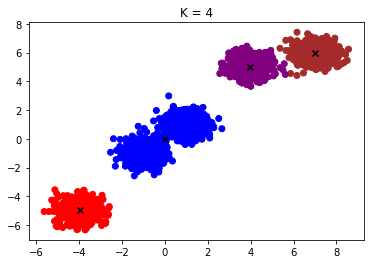

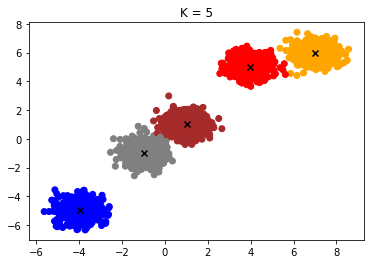

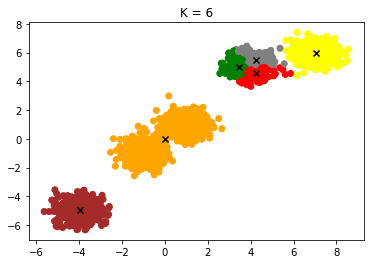

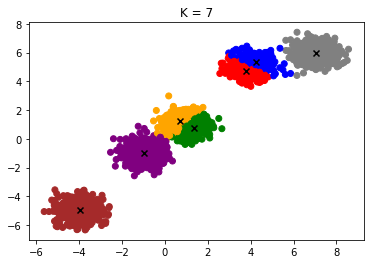

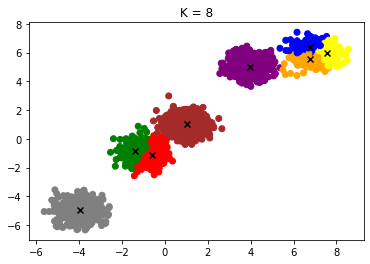

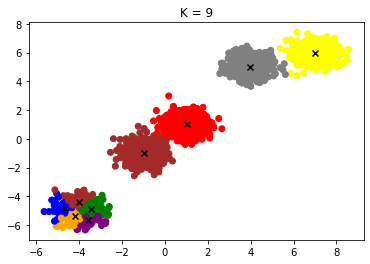

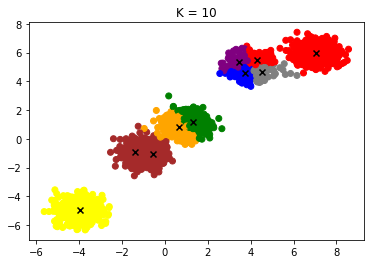

In [23]:
# Plotting the clusters for each value of k
for i in range(len(k_values)):
    plt.scatter(arr_loaded[:, 0], arr_loaded[:, 1], c=arr_cluster_vals[:, i], cmap=ListedColormap(['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'gray', 'brown']))
    plt.scatter(arr_centroid_vals[i][:, 0], arr_centroid_vals[i][:, 1], c='black', marker='x')
    plt.title("K = " + str(k_values[i]))
    plt.show()

In [5]:
# Calculating the distance matrix for the data points using the Euclidean distance
# distance_matrix[i][j] will store the distance between the ith and jth data point
distance_matrix = np.zeros((arr_loaded.shape[0], arr_loaded.shape[0]))
for i in range(arr_loaded.shape[0]):
    for j in range(arr_loaded.shape[0]):
        distance_matrix[i][j] = np.linalg.norm(arr_loaded[i] - arr_loaded[j])

In [24]:
# Silhoeutte Analysis for each value of k
def my_max(a, b):
    if(a > b):
        return a
    else:
        return b
    
def silhoeutte_analysis(k, data, clusters, centroids):
    
    # Calculating the average distance of each point from the points in its cluster
    a = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        a[i] = np.mean(distance_matrix[i][clusters == clusters[i]])

    # Calculating the average distance of each point from the points in the nearest cluster
    b = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        current_centroid_ci = np.zeros(2) 
        current_centroid_ci[0] = centroids[int(clusters[i])][0]
        current_centroid_ci[1] = centroids[int(clusters[i])][1]
        closest_centroid_cj = 0
        min_dist = np.Infinity
        for j in range(k):
            if(j != clusters[i]):
                dist = np.linalg.norm(current_centroid_ci - centroids[j])
                if(dist < min_dist):
                    min_dist = dist
                    closest_centroid_cj = j
        b[i] = np.mean(distance_matrix[i][clusters == closest_centroid_cj])
                    
    
    # Calculating the silhoeutte score for each point
    s = np.zeros(data.shape[0])
    for i in range(data.shape[0]):
        
        s[i] = (b[i] - a[i]) / my_max(a[i], b[i])

    # Calculating the average silhoeutte score for the entire dataset
    return np.mean(s)    

# Calculating the silhoeutte score for each value of k and finding the best value of k based on the silhoeutte score
silo_scores = np.zeros(len(k_values))

for i in range(len(k_values)):

    # Preparing the arrays clusters_k and centroids_k for the current value of k to input and find the silhoeutte score
    clusters_k = np.zeros(arr_loaded.shape[0])
    centroids_k = np.zeros((k_values[i], 2))

    for j in range(len(arr_cluster_vals)):
        clusters_k[j] = arr_cluster_vals[j][i]
    for j in range(len(arr_centroid_vals[i])):
        centroids_k[j] = arr_centroid_vals[i][j]

    silo_score = silhoeutte_analysis(k_values[i], arr_loaded, clusters_k, centroids_k)
    print("For k = " + str(k_values[i]) + "\nThe silhoeutte score is: " + str(silo_score))  
    silo_scores[i] = silo_score
    

For k = 2
The silhoeutte score is: 0.6637036342754637
For k = 3
The silhoeutte score is: 0.7355654343240736
For k = 4
The silhoeutte score is: 0.7349751988209212
For k = 5
The silhoeutte score is: 0.7283360576471305
For k = 6
The silhoeutte score is: 0.6587797868013178
For k = 7
The silhoeutte score is: 0.5643941729857186
For k = 8
The silhoeutte score is: 0.5781934079114028
For k = 9
The silhoeutte score is: 0.6407078577065906
For k = 10
The silhoeutte score is: 0.5044577852477639


- We only need to calculate the clusters till k = 10 as we notice the Silhoeutte Score drops as the value of k increases.
- Thus it is suffice to test for until k = 10 from k = 2.
- Now we find the optimal value of k and the centroids for applying fuzzy-means and solving next part of the question.

In [25]:
max_score = -np.inf
max_index = 0
for i in range(len(silo_scores)):
    if(silo_scores[i] > max_score):
        max_score = silo_scores[i]
        max_index = i

print("The optimal value of k is: " + str(k_values[max_index]))
optimal_k_val = k_values[max_index]
optimal_centroids = np.zeros((optimal_k_val, 2))
for i in range(len(arr_centroid_vals[max_index])):
    optimal_centroids[i] = arr_centroid_vals[max_index][i]

print("The optimal centroids are: ")
print(optimal_centroids)

The optimal value of k is: 3
The optimal centroids are: 
[[-3.97549737 -4.96579853]
 [ 0.0122514   0.01044589]
 [ 5.50229675  5.47526072]]


### Implementing Fuzzy Means

- We implement the Fuzzy Means for the optimal value of k which we obtain from the k-means clustering algorithm
- The Objective of Fuzzy Means is to minimise the following given cost function:
$$
J(U, V) = \sum^n_{i=1}\sum^{c}_{j=1}\, {(\mu_{ij})}^{m}(x_i - v_j)^{2}
$$
- For each iteration, the value of ${(\mu_{ij})}^{m}$ is:
$$
{(\mu_{ij})} = \frac {1}{\sum^c_{k=1} {(\frac{d_{ij}}{d_{ik}})}^{((2/m)-1)}}
$$
- Following constants are given to us:
$$
m = 2
$$
$$
\beta = 0.3
$$
- Since $m = 2$, the denominator becomes $$\sum_{k=1}^{c} {1}$$ 
- Thus, the the value of ${(\mu_{ij})}$ for any value of i and j is $1/k$ 


In [27]:
# We need to implement the fuzzy c-means algorithm now
# Tolerance given to us for the algorithm is 0.3
tolerance = 0.3

# It is given to us that c = optimal_k_val from k-means performed above
c = optimal_k_val

# The value of m or fuzziness is given to us as 2
m = 2
# Therefore, the value of membership of each point is equal to 1/c
membership = 1/c

# Initial value of the cost function is calculated as follows for the initial centroids given by k-means
# Note: We use Manhattan distance for distance calculation
cost_function = 0
for i in range(arr_loaded.shape[0]):
    for j in range(c):
        cost_function += ((np.linalg.norm(arr_loaded[i] - optimal_centroids[j]))) * (membership ** m)

print("The initial value of the cost function is: " + str(cost_function))

The initial value of the cost function is: 6646.422452885092


- Now taking `c = optimal_k_val` and initial centroids as the centroids we get from applying K-Means.
- We define a general fuzzy_c_means function which takes arguments and works for any type of dataset

In [28]:
# We now implement the fuzzy c-means algorithm
# We will use the same data points as the ones used in k-means
# We will use the same value of k as the one used in k-means
# We will use the same initial centroids as the ones used in k-means

def fuzzy_c_means(data, c, m, beta, optimal_centroids):
    # Step 1: Randomly select c data points as the initial centroids
    # We will use the centroids obtained from k-means as the initial centroids

    centroids = np.zeros((c, 2))
    for i in range(c):
        centroids[i][0] = optimal_centroids[i][1]
        centroids[i][1] = optimal_centroids[i][1]

    # The membership matrix is a matrix of size (n, c) where n is the number of data points and c is the number of clusters
    membership_matrix = np.zeros((data.shape[0], c))
    prev_membership_matrix = np.zeros((data.shape[0], c))

    max_iterations = 100
    for i in range(max_iterations):
        # Check for convergence
        if(np.allclose(membership_matrix, prev_membership_matrix, atol=beta) and i > 0):
            print("The algorithm has converged after " + str(i) + " iterations")
            break

        # Step 2: Calculate the fuzzy membership matrix 
        for i in range(data.shape[0]):
            for j in range(c):
                sum = 0
                for k in range(c):
                    sum += (np.linalg.norm(data[i] - centroids[j]) / np.linalg.norm(data[i] - centroids[k])) ** ((2/m)-1)
                membership_matrix[i][j] = 1/sum

        # Step 3: Update the centroids
        # The new centroids are calculated as follows:
        for i in range(c):
            sum = 0
            for j in range(data.shape[0]):
                sum += (membership_matrix[j][i] ** m) * data[j]
            centroids[i] = sum / np.sum(membership_matrix[:, i] ** m)

        # Step 4: Calculate the cost function
        cost_function = 0
        for i in range(data.shape[0]):
            for j in range(c):
                cost_function += (np.linalg.norm(data[i] - centroids[j])) * (membership_matrix[i][j] ** m)

        prev_membership_matrix = membership_matrix.copy()
    
    return centroids, membership_matrix, cost_function

# We now run the fuzzy c-means algorithm
centroids, membership_matrix, cost_function = fuzzy_c_means(arr_loaded, c, m, tolerance, optimal_centroids)
print("The final value of the cost function is: " + str(cost_function))
print("The final centroids are: ")
print(centroids)
print("The final membership matrix is: ")
print(membership_matrix)



The algorithm has converged after 1 iterations
The final value of the cost function is: 4842.0870191170125
The final centroids are: 
[[1.41071979 1.20112294]
 [1.41071979 1.20112294]
 [1.41071979 1.20112294]]
The final membership matrix is: 
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 ...
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]


- As we can see for our data, the `fuzzy_c_means` algorithm comverges after iteration and this is because the membership matrix does not change.
- This is because $\mu_{ij}=\frac{1}{k_{optimal}}$ for any combination of $i$ and $j$.
- Hence in the end all the centroids input from k-means get converged into one centroid only with the final value of the cost function being around 4.8k